# Generating Mood Playlists: Exploring the Dataset

In [1]:
# imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# allowing all the columns to be visualized
pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline

import warnings
warnings.filterwarnings(action='once')

In [2]:
# visualizations settings
sns.set_theme(style = "whitegrid", font_scale = 1.5)
qual_pal = sns.color_palette('hls', 8)

## Why is it important to explore the dataset?
This step is important because it helps us identify patterns and problems in the dataset. More importantly, it **helps us decide what models or algorithms to use in subsequent steps**. REMEMBER: **GARBAGE IN, GARBAGE OUT!**

### Data Exploration Plan
1. Identify and deal with outliers in data
Outliers–observations that have extremely large or small values relative to the majority of observations–can have great impact on results. Not identifying and dealing with them can lead to inaccurate outputs. Boxplots, histograms, violin plots, scatterplots, biplots can be used to detect outliers. 

2. Checking for homogeneity in variances
This is an important assumption in ANOVA, multivariate techniques and regression-based models. 

3. Checking for normally distributed data

4. Checking for missing values in data

5. Checking for multicollinearity (collinearity in covariates)

6. Checking for interaction between variables

7. Checking for independence in data

In [3]:
# importing in main dataset (audio features, genre, track id)
audio_features = pd.read_csv('/Users/huongngo/Desktop/PERSONAL PROJECTS/music_explorer/data/audio_features.csv')
audio_features = audio_features.drop(['Unnamed: 0'], axis = 1)
audio_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,explicit,artist_name,track_popularity
0,0.492,0.791,11,-5.045,1,0.0703,0.00816,0.000019,0.110,0.585,144.363,audio_features,0LJIVYOer8mlCmTrKoP9Kh,spotify:track:0LJIVYOer8mlCmTrKoP9Kh,https://api.spotify.com/v1/tracks/0LJIVYOer8ml...,https://api.spotify.com/v1/audio-analysis/0LJI...,218391,4,jazz,False,Michael Bublé,54
1,0.278,0.354,5,-6.647,0,0.0372,0.50200,0.001240,0.309,0.090,121.803,audio_features,3xZFuVIvzqBImEYJydRkp9,spotify:track:3xZFuVIvzqBImEYJydRkp9,https://api.spotify.com/v1/tracks/3xZFuVIvzqBI...,https://api.spotify.com/v1/audio-analysis/3xZF...,208866,3,jazz,False,Michael Bublé,47
2,0.509,0.457,6,-6.021,1,0.0381,0.39800,0.000000,0.104,0.521,116.472,audio_features,1ugWQPtI7SNYDXqEwuEjVm,spotify:track:1ugWQPtI7SNYDXqEwuEjVm,https://api.spotify.com/v1/tracks/1ugWQPtI7SNY...,https://api.spotify.com/v1/audio-analysis/1ugW...,185531,4,jazz,False,Michael Bublé,52
3,0.401,0.712,8,-4.518,1,0.0300,0.03710,0.001890,0.091,0.561,84.343,audio_features,4BECSdUBaiMX0dNmLHr0kZ,spotify:track:4BECSdUBaiMX0dNmLHr0kZ,https://api.spotify.com/v1/tracks/4BECSdUBaiMX...,https://api.spotify.com/v1/audio-analysis/4BEC...,197755,4,jazz,False,Michael Bublé,53
4,0.506,0.612,11,-6.297,1,0.0607,0.03010,0.000000,0.116,0.527,139.931,audio_features,7zqznhNk8DZbwo8fWIF82V,spotify:track:7zqznhNk8DZbwo8fWIF82V,https://api.spotify.com/v1/tracks/7zqznhNk8DZb...,https://api.spotify.com/v1/audio-analysis/7zqz...,143386,3,jazz,False,Michael Bublé,51


In [4]:
spec_type = ['NU', 'NU', 'NO', 'NU', 'NO', 'NU', 'NU', 'NU', 'NU', 'NU', 'NU', 'STR', 'STR', 'STR', 'STR', 'STR', 'NU', 'NO', 'NO', 'NO', 'STR', 'NU']
data_type = pd.DataFrame(audio_features.dtypes, columns = ['Data Type'])
data_type['Specific Data Type'] = spec_type
data_type.sort_values(by = ['Specific Data Type'])

,Data Type,Specific Data Type
explicit,bool,NO
key,int64,NO
genre,object,NO
mode,int64,NO
time_signature,int64,NO
danceability,float64,NU
duration_ms,int64,NU
valence,float64,NU
tempo,float64,NU
instrumentalness,float64,NU


In [5]:
audio_features['explicit'] = audio_features['explicit'].map({True: 'True', False: 'False'}) 

In [6]:
numeric_columns = list(audio_features.columns[:11]) + list(audio_features.columns[16:18]) + [audio_features.columns[-1]]
string_columns = list(audio_features.columns[11:16]) + list(audio_features.columns[18:20]) + [audio_features.columns[-2]]

In [7]:
# dataset info
audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52897 entries, 0 to 52896
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      52897 non-null  float64
 1   energy            52897 non-null  float64
 2   key               52897 non-null  int64  
 3   loudness          52897 non-null  float64
 4   mode              52897 non-null  int64  
 5   speechiness       52897 non-null  float64
 6   acousticness      52897 non-null  float64
 7   instrumentalness  52897 non-null  float64
 8   liveness          52897 non-null  float64
 9   valence           52897 non-null  float64
 10  tempo             52897 non-null  float64
 11  type              52897 non-null  object 
 12  id                52897 non-null  object 
 13  uri               52897 non-null  object 
 14  track_href        52897 non-null  object 
 15  analysis_url      52897 non-null  object 
 16  duration_ms       52897 non-null  int64 

In [8]:
# descriptive statistics about data
audio_features[numeric_columns[:6]].describe()

,danceability,energy,key,loudness,mode,speechiness
count,52897.000000,52897.000000,52897.000000,52897.000000,52897.000000,52897.000000
mean,0.545858,0.593354,5.248804,-9.254906,0.639186,0.094807
std,0.181316,0.265136,3.606166,5.813155,0.480241,0.125607
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000
25%,0.420000,0.405000,2.000000,-11.180000,0.000000,0.036000
50%,0.556000,0.634000,5.000000,-7.608000,1.000000,0.049300
75%,0.684000,0.814000,8.000000,-5.349000,1.000000,0.093000
max,0.989000,1.000000,11.000000,0.229000,1.000000,0.965000


In [9]:
audio_features[numeric_columns[6:]].describe()

,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_popularity
count,52897.000000,52897.000000,52897.000000,52897.000000,52897.000000,5.289700e+04,52897.000000,52897.000000
mean,0.340417,0.165000,0.229081,0.456094,118.815043,2.313948e+05,3.890221,26.845322
std,0.351263,0.317771,0.213840,0.257094,30.561409,1.232451e+05,0.474021,20.096229
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.339000e+03,0.000000,0.000000
25%,0.026500,0.000000,0.099000,0.242000,95.003000,1.786270e+05,4.000000,10.000000
50%,0.186000,0.000104,0.133000,0.442000,117.788000,2.175060e+05,4.000000,25.000000
75%,0.654000,0.072900,0.288000,0.657000,138.294000,2.661720e+05,4.000000,41.000000
max,0.996000,1.000000,0.999000,0.986000,248.060000,4.497994e+06,5.000000,97.000000


Loudness, acousticness, liveness, duration columns don't seem to be very useful in determining moods. 

Instrumentalness and speechiness seems to be similar features, so we might have to select either one of them, or none of them if they prove to not be useful in determining mood. 

Both tempo and time signature refer to rhythm of the music. We might choose either one of them. 

Track popularity is completely unrelated to mood. 

This leaves the following columns that are potentially good features to keep for clustering: danceability, energy, mode, valence, tempo, key. 

In [ ]:
# converting duration_ms to duration_s (milliseconds to seconds) to fix scale
audio_features['duration_s'] = audio_features['duration_ms'] * 0.001
print(audio_features.columns)
audio_features = audio_features.drop(['duration_ms'], axis = 1)
print(audio_features.columns)

In [ ]:
key_cnt = audio_features.groupby(['key']).count()
key_cnt = pd.DataFrame(key_cnt['id'])

ts_cnt = audio_features.groupby(['time_signature']).count()
ts_cnt = pd.DataFrame(ts_cnt['id'])

mode_cnt = audio_features.groupby(['mode']).count()
mode_cnt = pd.DataFrame(mode_cnt['id'])

exp_cnt = audio_features.groupby(['explicit']).count()
exp_cnt = pd.DataFrame(exp_cnt['id'])

In [ ]:
fig, axes = plt.subplots(4, 4, figsize = (35, 25))
sns.histplot(ax = axes[0, 0], data = audio_features, x = 'danceability', stat = 'density')
sns.boxplot(ax = axes[0, 1], data = audio_features, x = 'danceability')

sns.histplot(ax = axes[1, 0], data = audio_features, x = 'energy', stat = 'density')
sns.boxplot(ax = axes[1, 1], data = audio_features, x = 'energy')

sns.histplot(ax = axes[2, 0], data = audio_features, x = 'loudness', stat = 'density')
sns.boxplot(ax = axes[2, 1], data = audio_features, x = 'loudness')

sns.histplot(ax = axes[3, 0], data = audio_features, x = 'speechiness', stat = 'density')
sns.boxplot(ax = axes[3, 1], data = audio_features, x = 'speechiness')

sns.histplot(ax = axes[0, 2], data = audio_features, x = 'acousticness', stat = 'density')
sns.boxplot(ax = axes[0, 3], data = audio_features, x = 'acousticness')

sns.histplot(ax = axes[1, 2], data = audio_features, x = 'instrumentalness', stat = 'density')
sns.boxplot(ax = axes[1, 3], data = audio_features, x = 'instrumentalness')

sns.histplot(ax = axes[2, 2], data = audio_features, x = 'valence', stat = 'density')
sns.boxplot(ax = axes[2, 3], data = audio_features, x = 'valence')

sns.histplot(ax = axes[3, 2], data = audio_features, x = 'tempo', stat = 'density')
sns.boxplot(ax = axes[3, 3], data = audio_features, x = 'tempo')
axes[3, 0].set(xscale = 'log', yscale = 'log')
axes[1, 2].set(xscale = 'log', yscale = 'log')

In [ ]:
fig, axes = plt.subplots(5, 2, figsize = (20, 30))
sns.histplot(ax = axes[0, 0], data = audio_features, x = 'track_popularity', stat = 'density')
sns.boxplot(ax = axes[0, 1], data = audio_features, x = 'track_popularity')

sns.histplot(ax = axes[1, 0], data = audio_features, x = 'duration_s', stat = 'density')
sns.boxplot(ax = axes[1, 1], data = audio_features, x = 'duration_s')
axes[1, 0].set(xscale = 'log', yscale = 'log')

sns.histplot(ax = axes[2, 0], data = audio_features, x = 'liveness', stat = 'density')
sns.boxplot(ax = axes[2, 1], data = audio_features, x = 'liveness')

sns.barplot(ax = axes[3, 0], data = exp_cnt, x = exp_cnt.index, y = 'id')
sns.barplot(ax = axes[3, 1], data = key_cnt, x = key_cnt.index, y = 'id')
sns.barplot(ax = axes[4, 0], data = mode_cnt, x = mode_cnt.index, y = 'id')
sns.barplot(ax = axes[4, 1], data = ts_cnt, x = ts_cnt.index, y = 'id')

## Examining certain variables and their relationship with other variables to better understand them

### Valence
A measure from **0.0 to 1.0** describing the **musical positiveness** conveyed by a track. Tracks with **high valence** sound **more positive** (e.g. happy, cheerful, euphoric), while tracks with **low valence** sound **more negative** (e.g. sad, depressed, angry).

<AxesSubplot: xlabel='valence', ylabel='key'>

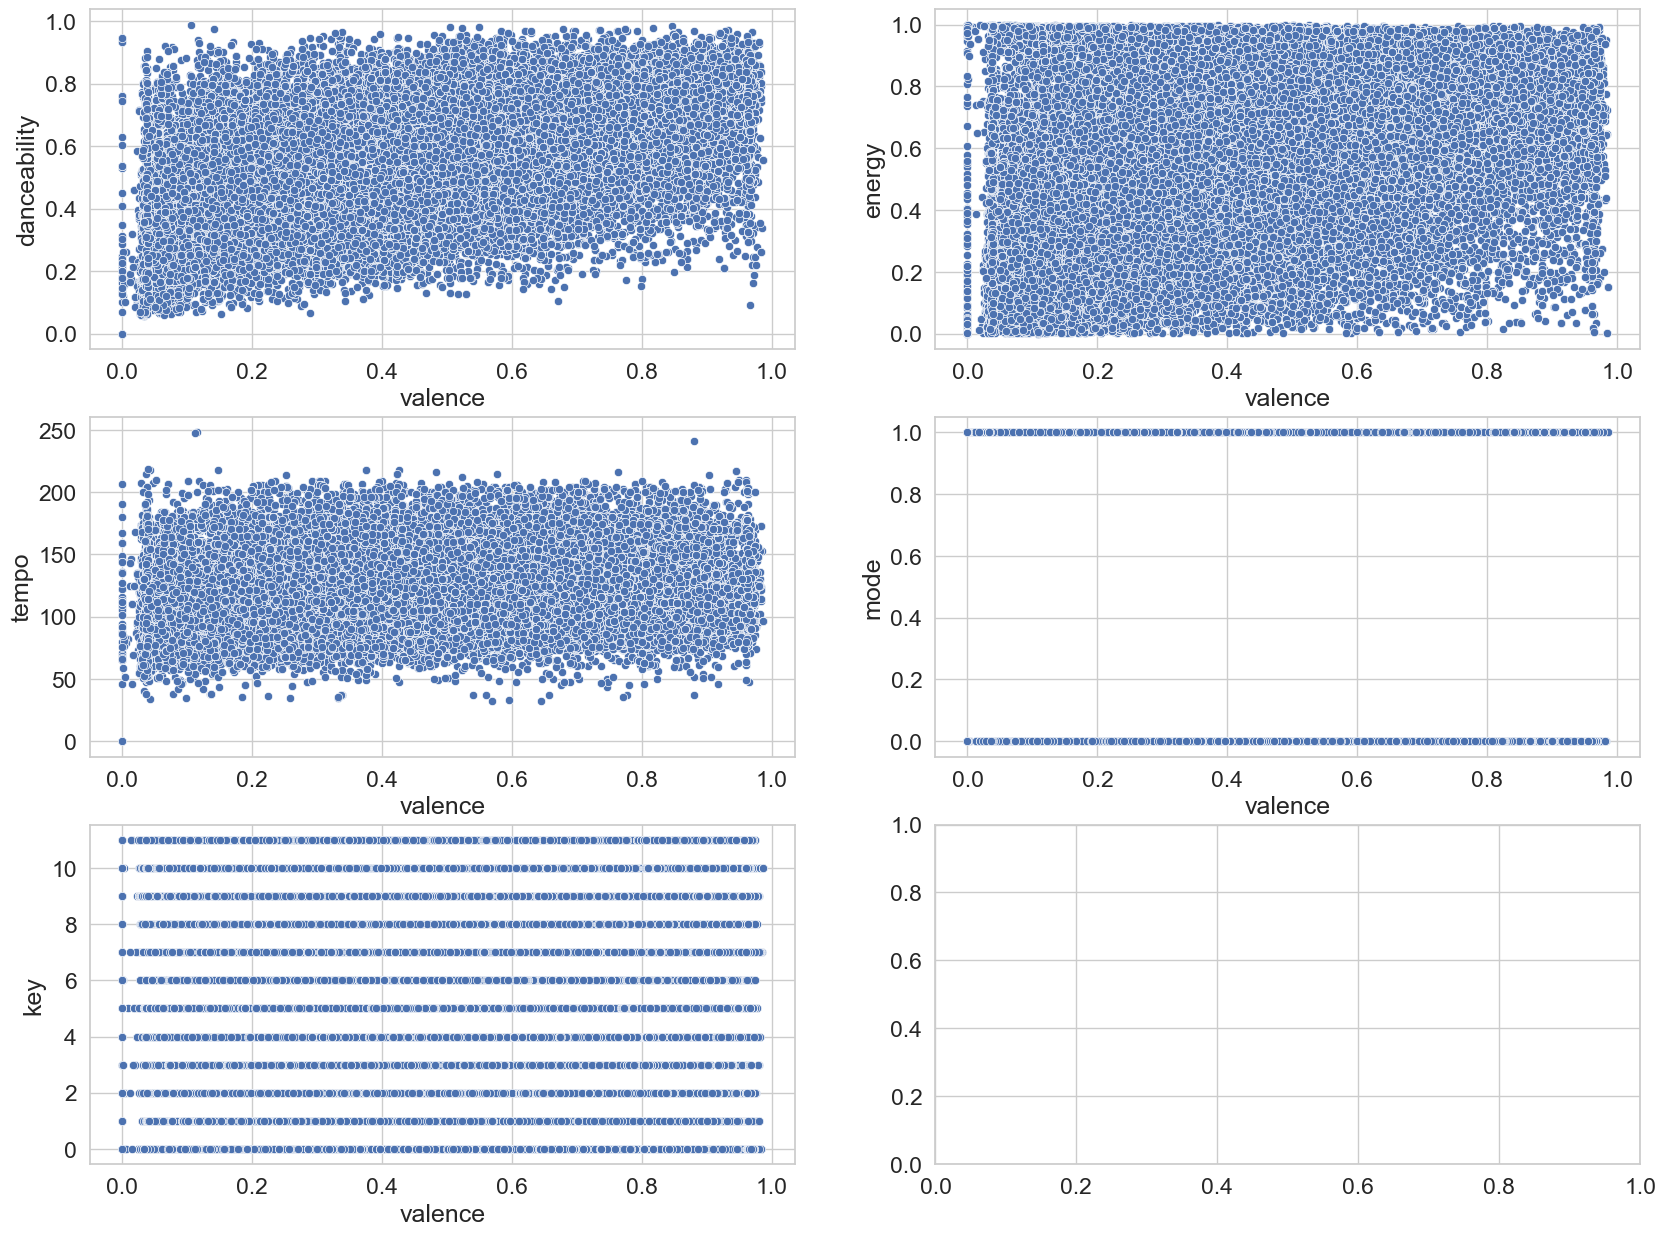

In [20]:
fig, axes = plt.subplots(3, 2, figsize = (20, 15))
sns.scatterplot(ax = axes[0, 0], data = audio_features, x = 'valence', y = 'danceability')
sns.scatterplot(ax = axes[0, 1], data = audio_features, x = 'valence', y = 'energy')
sns.scatterplot(ax = axes[1, 0], data = audio_features, x = 'valence', y = 'tempo')
sns.scatterplot(ax = axes[1, 1], data = audio_features, x = 'valence', y = 'mode')
sns.scatterplot(ax = axes[2, 0], data = audio_features, x = 'valence', y = 'key')

### Danceability

How suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of **0.0 is least danceable and 1.0 is most danceable**.

<AxesSubplot: xlabel='danceability', ylabel='key'>

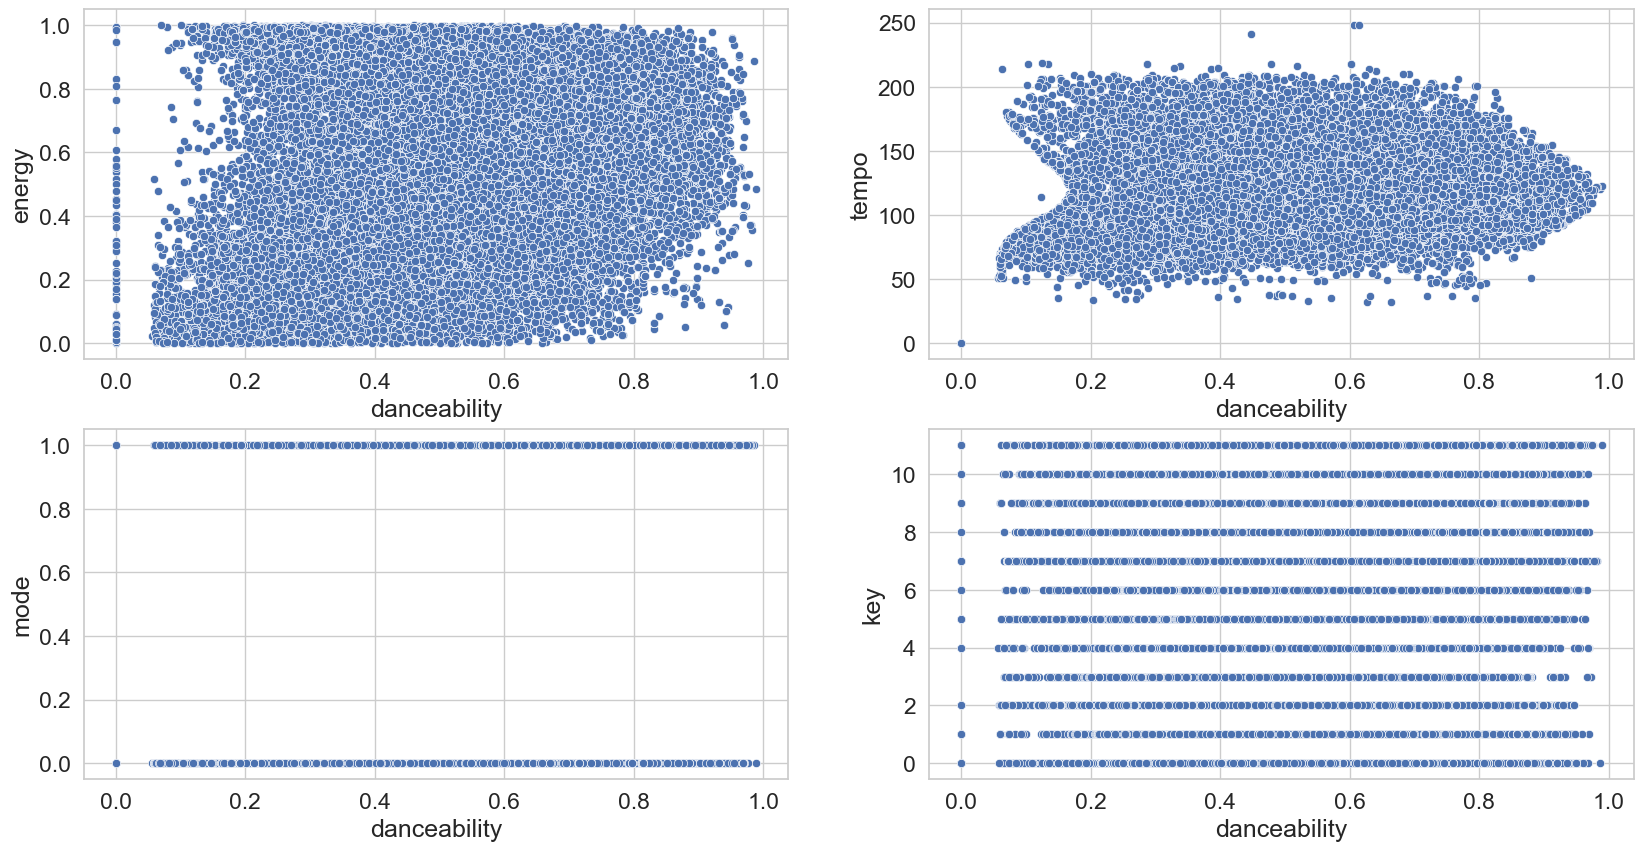

In [21]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))
sns.scatterplot(ax = axes[0, 0], data = audio_features, x = 'danceability', y = 'energy')
sns.scatterplot(ax = axes[0, 1], data = audio_features, x = 'danceability', y = 'tempo')
sns.scatterplot(ax = axes[1, 0], data = audio_features, x = 'danceability', y = 'mode')
sns.scatterplot(ax = axes[1, 1], data = audio_features, x = 'danceability', y = 'key')

### Energy

Energy is a measure from **0.0 to 1.0** and represents a **perceptual measure of intensity and activity**. Typically, **energetic tracks feel fast, loud, and noisy**. For example, **death metal has high energy**, while a **Bach prelude scores low on the scale**.

<AxesSubplot: xlabel='energy', ylabel='key'>

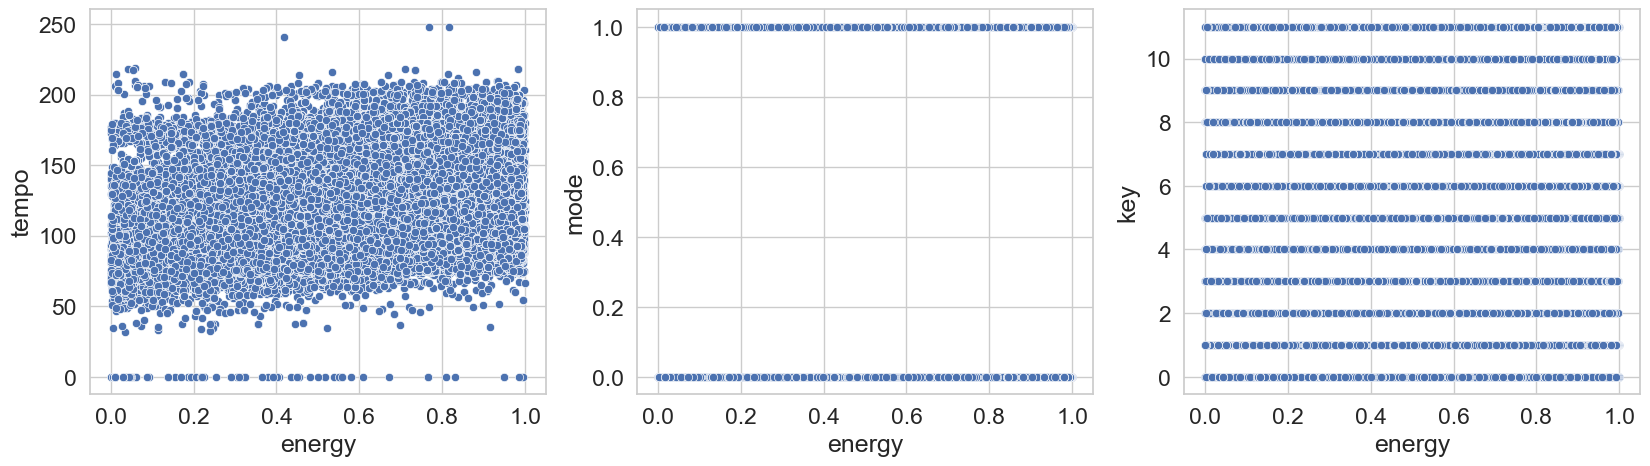

In [25]:
fig, axes = plt.subplots(1, 3, figsize = (20, 5))
sns.scatterplot(ax = axes[0], data = audio_features, x = 'energy', y = 'tempo')
sns.scatterplot(ax = axes[1], data = audio_features, x = 'energy', y = 'mode')
sns.scatterplot(ax = axes[2], data = audio_features, x = 'energy', y = 'key')

In [26]:
# one-hot encoding mode and explicit
from sklearn.preprocessing import OneHotEncoder

af_corr_df = audio_features
enc = OneHotEncoder()
encoded_cols = enc.fit_transform(af_corr_df[['explicit', 'mode']]).toarray()
print(enc.categories_)
enc_df = pd.DataFrame(encoded_cols, columns = ['explicit_false', 'explicit_true', 'mode_minor', 'mode_major'])
enc_df.head()

[array(['False', 'True'], dtype=object), array([0, 1])]


,explicit_false,explicit_true,mode_minor,mode_major
0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0


In [27]:
af_corr_df = af_corr_df.merge(enc_df, left_index = True, right_index = True)
af_corr_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,explicit,artist_name,track_popularity,explicit_false,explicit_true,mode_minor,mode_major
0,0.492,0.791,11,-5.045,1,0.0703,0.00816,0.000019,0.110,0.585,144.363,audio_features,0LJIVYOer8mlCmTrKoP9Kh,spotify:track:0LJIVYOer8mlCmTrKoP9Kh,https://api.spotify.com/v1/tracks/0LJIVYOer8ml...,https://api.spotify.com/v1/audio-analysis/0LJI...,218391,4,jazz,False,Michael Bublé,54,1.0,0.0,0.0,1.0
1,0.278,0.354,5,-6.647,0,0.0372,0.50200,0.001240,0.309,0.090,121.803,audio_features,3xZFuVIvzqBImEYJydRkp9,spotify:track:3xZFuVIvzqBImEYJydRkp9,https://api.spotify.com/v1/tracks/3xZFuVIvzqBI...,https://api.spotify.com/v1/audio-analysis/3xZF...,208866,3,jazz,False,Michael Bublé,47,1.0,0.0,1.0,0.0
2,0.509,0.457,6,-6.021,1,0.0381,0.39800,0.000000,0.104,0.521,116.472,audio_features,1ugWQPtI7SNYDXqEwuEjVm,spotify:track:1ugWQPtI7SNYDXqEwuEjVm,https://api.spotify.com/v1/tracks/1ugWQPtI7SNY...,https://api.spotify.com/v1/audio-analysis/1ugW...,185531,4,jazz,False,Michael Bublé,52,1.0,0.0,0.0,1.0
3,0.401,0.712,8,-4.518,1,0.0300,0.03710,0.001890,0.091,0.561,84.343,audio_features,4BECSdUBaiMX0dNmLHr0kZ,spotify:track:4BECSdUBaiMX0dNmLHr0kZ,https://api.spotify.com/v1/tracks/4BECSdUBaiMX...,https://api.spotify.com/v1/audio-analysis/4BEC...,197755,4,jazz,False,Michael Bublé,53,1.0,0.0,0.0,1.0
4,0.506,0.612,11,-6.297,1,0.0607,0.03010,0.000000,0.116,0.527,139.931,audio_features,7zqznhNk8DZbwo8fWIF82V,spotify:track:7zqznhNk8DZbwo8fWIF82V,https://api.spotify.com/v1/tracks/7zqznhNk8DZb...,https://api.spotify.com/v1/audio-analysis/7zqz...,143386,3,jazz,False,Michael Bublé,51,1.0,0.0,0.0,1.0


/var/folders/6g/t90358yn4ynclrp0db92rf1c0000gn/T/ipykernel_78974/2231766332.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(af_corr_df.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')


<AxesSubplot: >

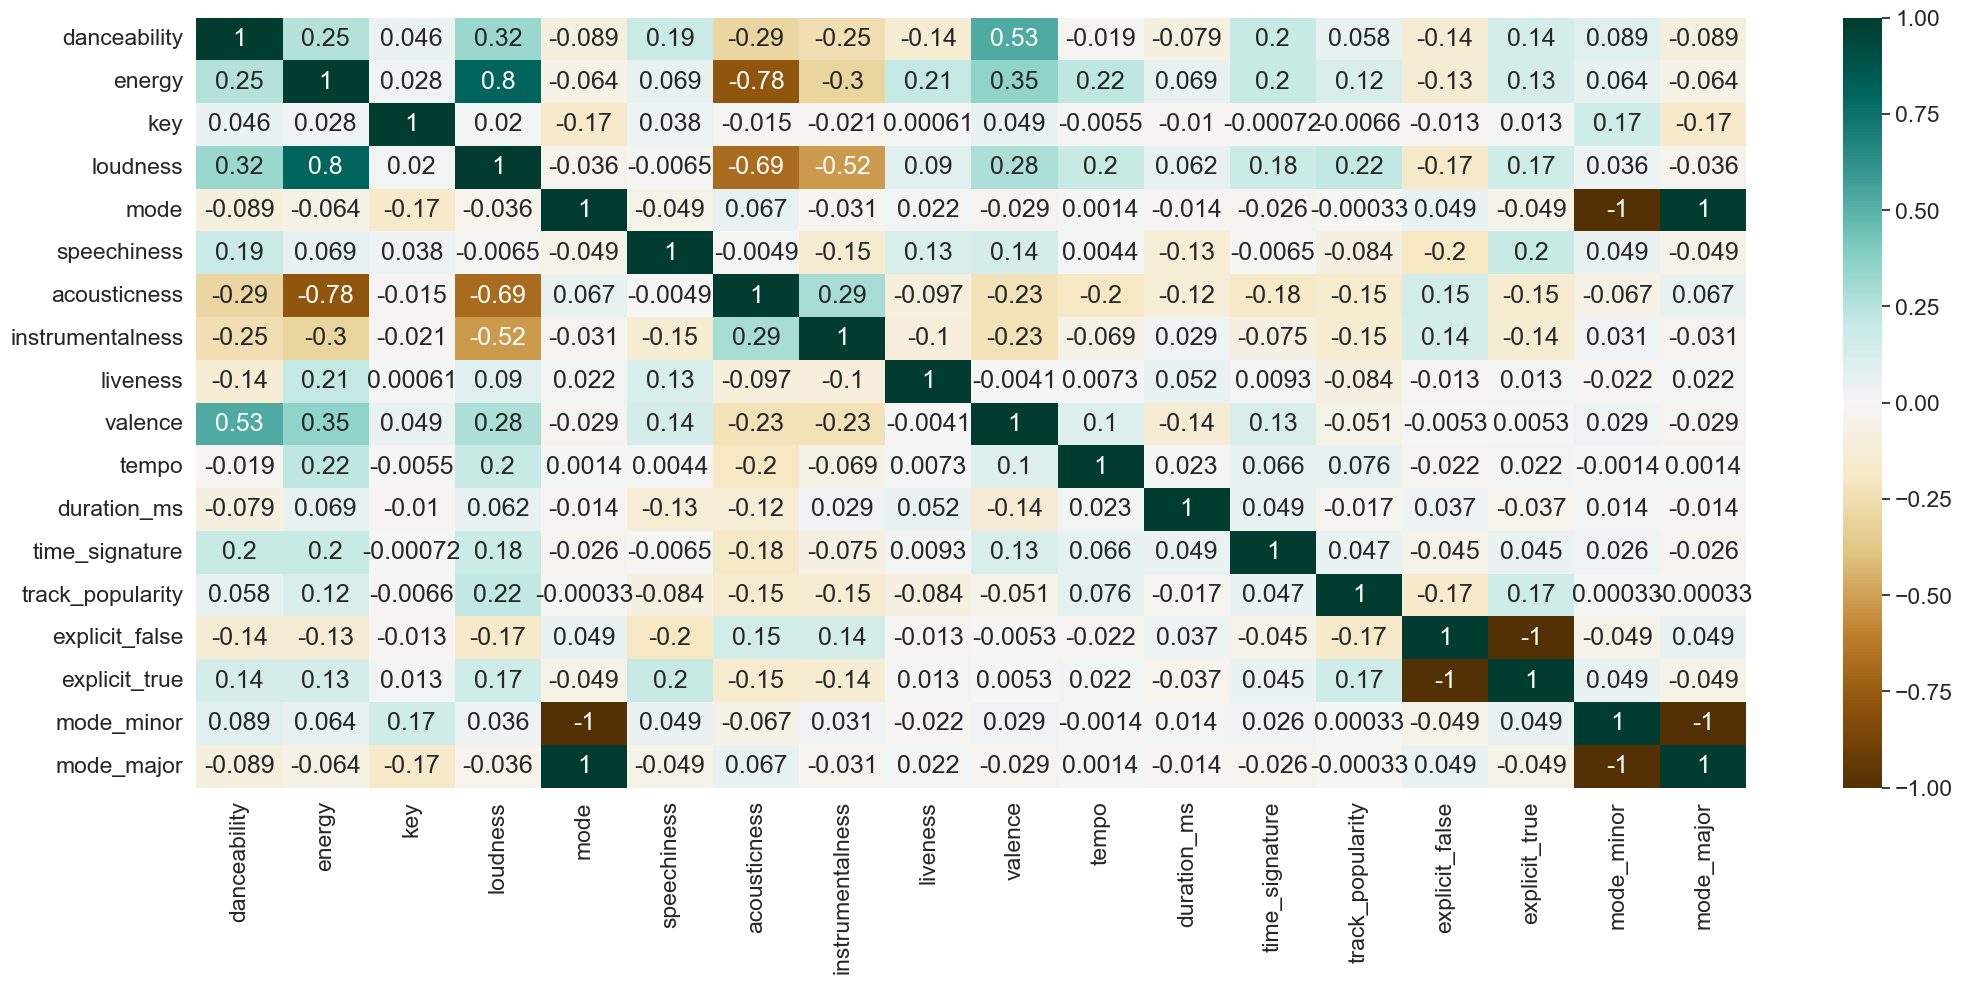

In [28]:
plt.figure(figsize = (25, 10))
sns.heatmap(af_corr_df.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')

## Feature Engineering

In terms checking for multicollinearity, we're going to use 0.7/0.8 as our cutoff. 

- Energy and loudness have a high correlation of 0.8
- Energy and acousticness have a high correlation of -0.78

Thus, we will be dropping both loudness and acousticness since they're also both not useful to determining mood classes. 

We'll also be dropping liveness and duration because they have too many outliers. 

Since explicit has a lot of 'False', it seems that it won't add much to figuring out mood classes. 

Although instrumentalness and speechiness don't have much correlation with each other, we'll be dropping both of them as they have too many outliers. 

We will drop time signature as it doesn't play much of a role in determining emotion/mood of a song.

Columns we'll be keeping: danceability, energy, mode, valence, tempo, key. 